In [1]:
import tensorflow as tf
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import pandas as pd

/home/shailygupta/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shailygupta/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shailygupta/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shailygupta/anaconda3/lib/python3.7/site-packages/tensorflow/

In [2]:
from keras.datasets import reuters
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test)= reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [3]:
pd.DataFrame(x_train).head(5)

,0
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ..."
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,..."
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,..."
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46..."
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2..."


Pads sequences to the same length.

In [4]:
max_words=10000
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

In [5]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
pd.DataFrame(x_train).head(5)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,0,0,0,0,0,0,0,0,...,29,209,30,32,132,6,109,15,17,12
1,0,0,0,0,0,0,0,0,0,0,...,7,48,34,191,44,35,1795,505,17,12
2,0,0,0,0,0,0,0,0,0,0,...,11,9,2,81,5,102,59,11,17,12
3,0,0,0,0,0,0,0,0,0,0,...,64,10,2281,455,5,7003,125,222,17,12
4,0,0,0,0,0,0,0,0,0,0,...,303,163,16,64,772,13,94,156,17,12


In [7]:
print(len(x_train))
print(len(y_test))

8982
2246


Embeddings are vector representations of a particular word.ex-Word2Vec,Glove,etc.

In [20]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(64, activation='relu'))            
network.add(layers.Dense(46, activation='softmax'))


In [21]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [22]:
from keras import callbacks
check=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [23]:
history = network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=512, verbose=2,callbacks=[check])

Train on 8982 samples, validate on 2246 samples
Epoch 1/2
 - 1s - loss: 10.8414 - acc: 0.3257 - val_loss: 10.2854 - val_acc: 0.3620
Epoch 2/2
 - 1s - loss: 10.4493 - acc: 0.3517 - val_loss: 10.2854 - val_acc: 0.3620


In [16]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10000, 32)         320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                20480064  
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 20,803,054
Trainable params: 20,803,054
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Final evaluation of the model
scores = network.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 36.20%


In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

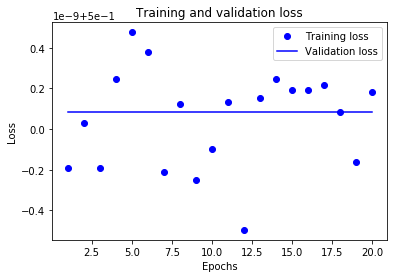

In [58]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()